In [0]:
import numpy as np
import matplotlib.pyplot as plt

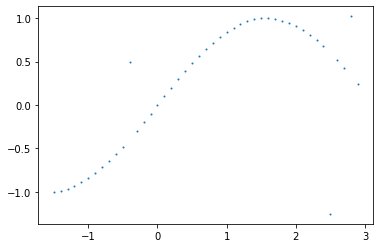

In [0]:
def f(x):
    N = x.shape[0] // 10
    np.random.seed(71)
    y = np.sin(x)
    for idx in np.random.randint(0, x.shape[0], size=N):
        y[idx] += np.random.normal()
    return y
X = np.arange(-1.5, 3, 0.1)[:, np.newaxis]
y = f(X)
plt.scatter(X, y, s=1)

In [0]:
def mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

In [0]:
def divide(X, Y, depth, min_nodes=5):
    if depth == 0 or X.shape[0] < 2 * min_nodes - 1:
        return {'type': 'leaf', 'y': np.mean(Y), 'samples': Y.shape[0]}
    Is = -np.inf
    min_row = -1
    min_col = -1
    for row in range(0, X.shape[1]):
        idx = np.argsort(X[:,row])
        x = X[idx]
        y = Y[idx]
        mse = np.mean((y - np.mean(y)) ** 2)
        for col in range(min_nodes, y.shape[0] - min_nodes):
            yl = y[:col]
            yr = y[col:]
            il = np.mean((yl - np.mean(yl)) ** 2)
            ir = np.mean((yr - np.mean(yr)) ** 2)
            N = y.shape[0]
            I = mse - (yl.shape[0] / N) * il - (yr.shape[0] / N) * ir
            if Is < I:
                Is = I
                min_row, min_col = row, col
    idx = np.argsort(X[:,min_row])
    X = X[idx]
    Y = Y[idx]
    Xl = X[:min_col, :]
    Xr = X[min_col:, :]
    Yl = Y[:min_col]
    Yr = Y[min_col:]


    conds = {
        'type': 'node',
        'row': min_row,
        'threshold': X[min_col, min_row],
        'left': divide(Xl,Yl,depth-1, min_nodes=min_nodes),
        'right': divide(Xr, Yr, depth-1, min_nodes=min_nodes)
    }
    return conds

In [0]:
def calc(tree, x):
    n = tree
    while n['type'] != 'leaf':
        th = n['threshold']
        row = n['row']
        if x[row] < th:
            n = n['left']
        else:
            n = n['right']
    return n['y']

In [0]:
def print_tree(tree, padding=0):
    if tree['type'] == 'leaf':
        print((' ' * padding) + 'y: ' + str(tree['y']) + ', samples: ' + str(tree['samples']))
    else:
        print((' ' * padding) + 'if row[' + str(tree['row']) + '] < ' + str(tree['threshold']) + ', then')
        print_tree(tree['left'], padding=padding+1)
        print((' ' * padding) +'else')
        print_tree(tree['right'], padding=padding+1)

In [0]:
tree = divide(X, y, 2)

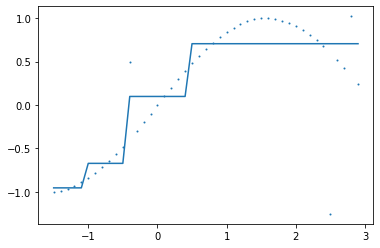

In [0]:
N =  X.shape[0]
y_pred = np.zeros(N)

for i in range(N):
    y_pred[i] = calc(tree, X[i])

plt.scatter(X, y, s=1)
plt.plot(X, y_pred)

In [0]:
print_tree(tree)

if row[0] < -0.399999999999999, then
 if row[0] < -0.9999999999999996, then
  y: -0.9539498696076738, samples: 5
 else
  y: -0.6717399474286383, samples: 6
else
 if row[0] < 0.5000000000000018, then
  y: 0.09899857755249557, samples: 9
 else
  y: 0.7065902945833694, samples: 25


In [0]:
tree2 = divide(X, y, 5)

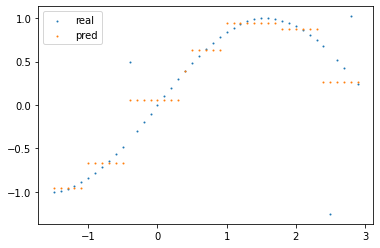

In [0]:
N =  X.shape[0]
y_pred = np.zeros(N)

for i in range(N):
    y_pred[i] = calc(tree2, X[i])

plt.scatter(X, y, s=1, label="real")
plt.scatter(X, y_pred, s=1, label="pred")
plt.legend()

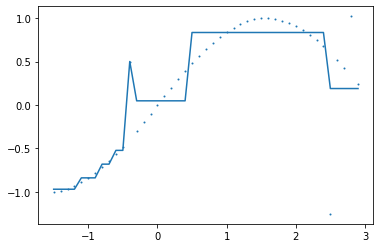

In [0]:
t = divide(X, y, 3, min_nodes=1)
N =  X.shape[0]
y_pred = np.zeros(N)

for i in range(N):
    y_pred[i] = calc(t, X[i])

plt.scatter(X, y, s=1)
plt.plot(X, y_pred)